# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیدا کردن تغییرناپذیر مقیاس گوشه‌ها با روش sift </div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
در بخشهای قبلی، برخی از آشکارسازهای گوشه‌ نظیر روش هریس را دیدیم.
از آنجایی که گوشه ها در تصویر چرخانده شده نیز گوشه باقی می مانند، روشهای بررسی شده در مقابل چرخش مقاوم هستند، به این معنی که حتی اگر تصویر چرخانده شود، بازهم می‌توانیم گوشه‌ها را بیابیم. 
اما دو روش قبل در مقابل مقایس‌پذیری مقاوم نیستند! به عنوان مثال، یک تصویر ساده زیر را بررسی کنید. یک گوشه در یک تصویر کوچک در یک پنجره کوچک هنگامی که در همان پنجره بزرگ‌نمایی می‌شود صاف است. بنابراین آشکارسازی گوشه به روش هریس در مقابل مقیاس تصویر تغییر ناپذیر و مقاوم نیست.
</div>
<img src="./lecture_images/sift_scale_invariant.jpg" />


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
بر اساس patent ثبت شده برای این الگوریتم و انقضای این پتنت در سال 2020 در نسخه های بالای نسخه 4.4 این الگوریتم  مستقیما در خود OpenCV قابل استفاده است.
<br/ >
پس نخست نسخه ی OpenCV خود را بررسی میکنیم که زیر 4.4 نباشد
</div>

In [1]:
import cv2
cv2.__version__

'4.6.0'

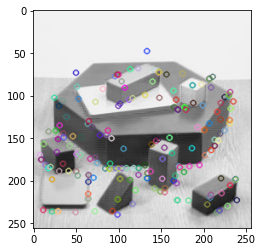

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Initiate SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(img,kp,img)
plt.imshow(img),plt.show();


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
سایز و جهت را نیز چاپ کنیم!</div>

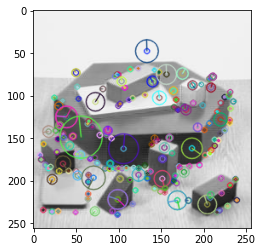

In [3]:
r = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(r)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
حال دو تصویر جدید لود کرده و نمایش می‌دهیم!</div>

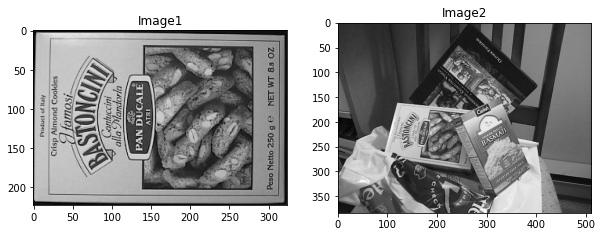

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png') 

plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(img1[...,::-1]),plt.title('Image1');
plt.subplot(122),plt.imshow(img2[...,::-1]),plt.title('Image2');

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
استخراج نقاط مهم و همچنین توصیفگر این نقاط با روش SIFT از هر دو تصویر</div>

In [5]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
به ابعاد نگاهی میاندازیم! بعد اول هر توصیفگر نمایانگر تعداد تقطه ی مهم در آن تصویر و بعد دوم نمایانگر طول توصیفگر(در اینجا 128 است)</div>

In [6]:
print(des1.shape)
print(des2.shape)

(604, 128)
(969, 128)


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش این نقاط مهم</div>

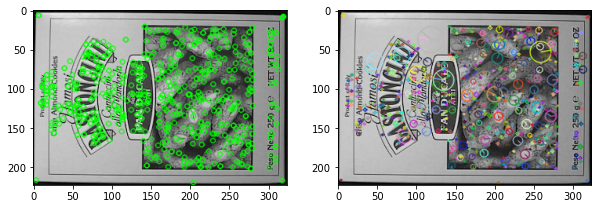

In [7]:
keypoints_without_size = np.copy(img1)
keypoints_with_size = np.copy(img1)

cv2.drawKeypoints(img1, kp1, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(keypoints_without_size[...,::-1]);
plt.subplot(122),plt.imshow(keypoints_with_size[...,::-1]);

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
تطبیق نقاط مهم دو تصویر بر اساس شباهت توصیفگر آنها</div>

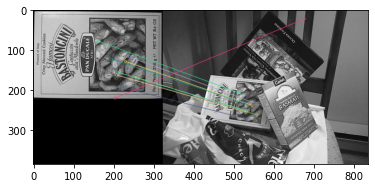


Number of Matching Keypoints Between The Training and Query Images:  604


In [8]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show();
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html